# Project 11 -- Sri Krishna Teja, Mannava

**TA Help:** None
    
**Collaboration:** None

## Question 1

In [1]:
import pandas as pd

In [2]:
# Part a.
def monthlydepdelays(year: int) -> int:
    """
    The monthlydepdelays function takes a year as the input, and uses groupby
    to return a Series of length 12 with the average DepDelay for flights starting
    at IND in each of the 12 months of that year.

    Args:
    year (int): This is a year as the input

    Returns:
    myvalue (int): Series of length 12 with the average DepDelay for flights starting
                   at IND in each of the 12 months of that year.
    """
    myDF = pd.read_csv("/anvil/projects/tdm/data/flights/subset/" + str(year) + ".csv", usecols=[1, 15, 16])
    myvalue = myDF[myDF['Origin'] == "IND"].groupby("Month")["DepDelay"].mean()
    return myvalue

In [3]:
# Part b.
monthlydepdelays(1990)

Month
1     7.282772
2     9.497027
3     6.924841
4     4.949858
5     5.471487
6     6.010835
7     4.307377
8     5.639782
9     4.455586
10    4.473725
11    3.408304
12    9.764105
Name: DepDelay, dtype: float64

In [4]:
monthlydepdelays(1998)

Month
1      6.314439
2      5.866770
3      9.898317
4      7.766752
5      8.980092
6     15.866469
7      7.579602
8      5.765383
9      3.122498
10     5.169646
11     4.346535
12     9.228510
Name: DepDelay, dtype: float64

In [5]:
monthlydepdelays(2005)

Month
1      7.689248
2      4.956196
3      6.881828
4      2.988902
5      1.302440
6      8.472591
7     12.218633
8      6.812698
9      2.795146
10     4.850184
11     4.897145
12    11.572550
Name: DepDelay, dtype: float64

I wrote and tested a monthlydepdelays function to get average DepDelay from IND for each month in 1990, 1998, and 2005.

## Question 2

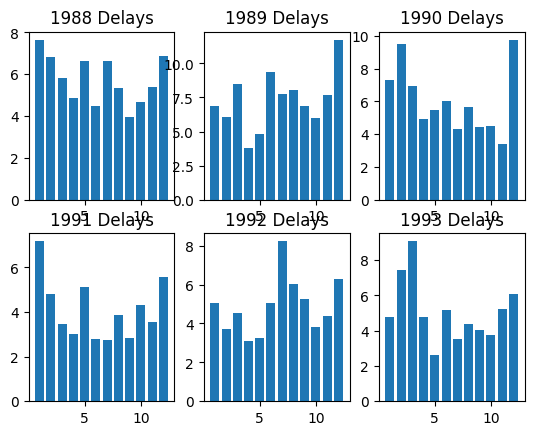

In [6]:
import matplotlib.pyplot as plt
allmyyears = [myyear for myyear in range(1988,1994)]
myresults = [monthlydepdelays(myyear) for myyear in allmyyears]
nrow = 2
ncol = 3
fig, axs = plt.subplots(nrow, ncol)
for i, ax in enumerate(fig.axes):
    ax.bar(myresults[i].index, myresults[i])
    ax.set_title(str(allmyyears[i]) + " Delays")

Created a 3×2 grid of plots showing monthlydepdelays results from 1988 to 1993.

## Question 3

In [7]:
# Part a.
def myindycities(year: int) -> int:
    """
    The myindycities function takes a year as the input and uses groupby
    to make a Series of length 10, containing the top 10 cities in Indiana 
    according to the sum of the amount of donations (in dollars) given in each city,
    during that year.

    Args:
    year (int): This is a year as the input

    Returns:
    myvalue (int): Series of length 10, containing the top 10 cities in Indiana 
                   according to the sum of the amount of donations (in dollars) given
                   in each city,
    """
    myDF = pd.read_csv("/anvil/projects/tdm/data/election/itcont" + str(year) + ".txt", header=None, sep='|', usecols=[8, 9,14], encoding='Windows-1252')
    myDF.columns = ["CITY", "STATE", "TRANSACTION_AMT"]
    myvalue = myDF[myDF['STATE'] == "IN"].groupby("CITY")["TRANSACTION_AMT"].sum().sort_values().tail(10)
    return myvalue

In [8]:
# Part b.
myindycities(1980)

CITY
LAFAYETTE        49851
SOUTH BEND       68332
FT WAYNE         70174
INDPLS           76396
CARMEL           85872
FORT WAYNE       87115
EVANSVILLE       94605
ELKHART         111385
MUNCIE          159897
INDIANAPOLIS    753547
Name: TRANSACTION_AMT, dtype: int64

In [9]:
myindycities(1986)

CITY
COLUMBUS         40400
ZIONSVILLE       50900
TERRE HAUTE      62361
CARMEL           75993
SOUTH BEND       81841
EVANSVILLE       84815
ELKHART         100350
MUNCIE          100433
FORT WAYNE      149194
INDIANAPOLIS    995379
Name: TRANSACTION_AMT, dtype: int64

In [10]:
myindycities(1992)

CITY
ZIONSVILLE        94370
BLOOMINGTON      121733
COLUMBUS         143096
ELKHART          196432
MUNCIE           251164
SOUTH BEND       274397
EVANSVILLE       308566
CARMEL           384683
FORT WAYNE       524980
INDIANAPOLIS    2583618
Name: TRANSACTION_AMT, dtype: int64

Wrote and tested myindycities to return the top 10 Indiana cities by total donations for 1980, 1986, and 1992.

## Question 4

In [11]:
# part a.

allmyyears = [myyear for myyear in range(1984,1995,2)]
myresults = [myindycities(myyear) for myyear in allmyyears]

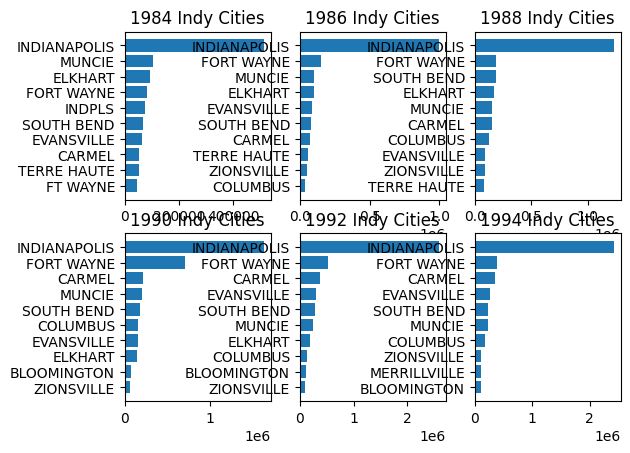

In [12]:
import matplotlib.pyplot as plt
nrow = 2
ncol = 3
fig, axs = plt.subplots(nrow, ncol)
for i, ax in enumerate(fig.axes):
    ax.barh(myresults[i].index, myresults[i])
    ax.set_title(str(allmyyears[i]) + " Indy Cities")

**Overview:**

Part A: I showed the results of `myindycities` for each `even-numbered` year from `1984` to `1994`.

Part B: Made a horizontal bar plot for each of the `6` years in `part a`.

## Question 5

In [13]:
# part a.

bj_df = pd.read_csv("/anvil/projects/tdm/data/icecream/bj/reviews.csv")
breyers_df = pd.read_csv("/anvil/projects/tdm/data/icecream/breyers/reviews.csv")
hd_df = pd.read_csv("/anvil/projects/tdm/data/icecream/hd/reviews.csv")
talenti_df = pd.read_csv("/anvil/projects/tdm/data/icecream/talenti/reviews.csv")

In [14]:
bj_df["stars"].mean() # average number of stars for bj

4.305803852448697

In [15]:
breyers_df["stars"].mean() # average number of stars for breyers

4.0279608548032755

In [16]:
hd_df["stars"].mean() # average number of stars for hd

4.2184747583243825

In [17]:
talenti_df["stars"].mean() # average number of stars for talenti

4.311624477758663

In [20]:
# part b.

def myavgstars(brand: str) -> float:
    """
    The myavgstars function takes a company name (e.g., either "bj" or "breyers" or "hd" or "talenti")
    as input, and returns the average number of stars for that company.

    Args:
    brand (str): Takes a company name (e.g., either "bj" or "breyers" or "hd" or "talenti")

    Returns:
    myvalue (float): Average number of stars for that company.
    """
    myDF = pd.read_csv(f"/anvil/projects/tdm/data/icecream/{brand}/reviews.csv")
    myvalue = myDF["stars"].mean()
    return myvalue

In [21]:
# part c.

mycompanies = ["bj", "breyers", "hd", "talenti"]
[myavgstars(x) for x in mycompanies]

[4.305803852448697, 4.0279608548032755, 4.2184747583243825, 4.311624477758663]

**Overview:**

1. Printed the average number of stars for each of the `4` ice cream companies.

2. Wrote a function `myavgstars` that takes a company name (e.g., either "bj" or "breyers" or "hd" or "talenti")
   as input, and returns the average number of stars for that company.

3. Used a list comprehension to run the function from `part b` on the list `mycompanies`, which gave the same values as in part a.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.